# Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,AK_2013_VCP_1,3/1/2013,180000.0,0.0,Metro,Non-LMI,0.0,5.0,541511,3.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
1,AK_2013_VCP_3,12/30/2013,265000.0,0.0,Metro,Non-LMI,0.0,7.0,541511,2.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
2,AK_2014_VCP_1,4/11/2014,199500.0,0.0,Metro,Non-LMI,0.0,2.0,336612,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
3,AK_2014_VCP_2,5/15/2014,125000.0,0.0,Metro,LMI,1494916.0,8.0,451110,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
4,AK_2014_VCP_3,9/15/2014,120000.0,0.0,Metro,Non-LMI,41000.0,0.0,336612,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0


In [3]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 16)


In [4]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [5]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

In [6]:
df=df[df['active_status']!='Unknown']

In [7]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

['Did not attempt to confirm operations' 'Yes'
 'Attempted to confirm operations, but unable' 'Other' 'Sold' 'Exit'
 'Loss' 'Bankrupt' 'Moved']


## Encoding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 778 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      4050 non-null   object 
 1   disbursement_date              4050 non-null   object 
 2   loan_investment_amount         4050 non-null   float64
 3   lender_insurance_premium       4050 non-null   float64
 4   metro_type                     4050 non-null   object 
 5   LMI_type                       4050 non-null   object 
 6   revenue                        4050 non-null   float64
 7   full_time_employees            4050 non-null   float64
 8   naics_code                     4050 non-null   int64  
 9   jobs_created                   4050 non-null   float64
 10  lender_type_category           4050 non-null   object 
 11  optional_primary_use_of_funds  4050 non-null   object 
 12  optional_revenue_yr_confirmed  4050 non-null   flo

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Encode 'active_status' column
df['active_status'] = df['active_status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Get the list of categorical columns excluding 'active_status'
categorical_columns = [col for col in df.select_dtypes(include=['object']) if col != 'active_status']

# Apply one-hot encoding to remaining categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df.head())


     loan_investment_amount  lender_insurance_premium     revenue  \
778                100000.0                       0.0  2027806.00   
800                240000.0                       0.0  1662422.00   
802                282000.0                       0.0   268058.00   
832                 50000.0                       0.0   254153.58   
847                 21500.0                       0.0        0.00   

     full_time_employees  naics_code  jobs_created  \
778                 12.0      541330           0.0   
800                  2.0      238220           0.0   
802                 11.0      722511           1.0   
832                  4.0      487210           0.0   
847                  1.0      453310           0.0   

     optional_revenue_yr_confirmed  active_status  support_amount  \
778                         2014.0              0         80000.0   
800                         2014.0              0        180000.0   
802                         2014.0              0    

In [10]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

[0 1]


## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

,loan_investment_amount,lender_insurance_premium,revenue,full_time_employees,naics_code,jobs_created,optional_revenue_yr_confirmed,active_status,support_amount,unique_id_CA_2011_LGP_103,...,optional_primary_use_of_funds_Fund Construction Costs,optional_primary_use_of_funds_Purchase Equipment,optional_primary_use_of_funds_Purchase Real Estate,optional_primary_use_of_funds_Refinance,"optional_primary_use_of_funds_Wages, Working Capital, & Professional Services",optional_stage_Early Stage,optional_stage_Growth,optional_stage_Mezzanine,optional_stage_Pre-Seed,optional_stage_Seed
0,-0.315060,-0.198289,0.035271,2.041887,0.174757,-0.396519,-0.43048,-1.204813,0.134016,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
1,-0.208173,-0.198289,0.020824,-0.558458,-1.671985,-0.396519,-0.43048,-1.204813,0.664893,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
2,-0.176107,-0.198289,-0.034310,1.781853,1.278630,-0.313751,-0.43048,-1.204813,0.906973,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
3,-0.353234,-0.198289,-0.034859,-0.038389,-0.154977,-0.396519,-0.43048,-1.204813,-0.157967,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
4,-0.374993,-0.198289,-0.044909,-0.818492,-0.361517,-0.396519,-0.43048,-1.204813,-0.199375,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311


## PCA

In [12]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.383951,-3.377820,-1.911260,1.491737,-2.468738,0.765146,0.880203,-0.464011,0.585468,2.259520,-1.315742,-1.519434,-0.458925,1.494173,-3.790669,0.967665
1,-0.547577,-2.683967,3.730950,1.117895,-0.634078,1.052797,1.205733,-0.350556,-0.523599,2.137685,0.011843,-4.387928,-3.079960,1.790371,-0.122484,-1.670461
2,-1.020578,-2.808776,2.990733,2.869103,-0.128994,0.388428,1.043860,-0.180050,-1.838315,-0.291732,-1.270532,-3.849211,-1.069523,-2.761244,-4.000163,1.442269
3,-0.406253,-2.722134,-2.453812,-3.280747,-0.272108,-0.102761,1.095635,0.549784,-1.282514,1.110770,1.376562,-0.103444,0.036273,-2.241795,-1.508175,-0.052424
4,-1.178305,-2.833317,-1.153398,-0.039524,-0.831607,-0.362853,0.969066,-1.525766,-1.469775,1.812094,1.955267,0.815105,3.912734,3.359782,0.485105,-3.135342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,-1.395423,3.067106,3.087736,2.736497,4.241201,-0.204314,-4.206250,-4.824275,2.489464,2.619754,0.110248,-2.506086,-0.062261,2.694198,-0.918854,2.781574
4046,-2.295653,2.082177,-0.479516,2.371094,0.180987,2.393563,3.630558,0.920693,-0.621584,0.771802,-0.033957,1.810895,-0.680091,0.516566,3.589981,-2.437469
4047,-2.752204,3.503533,2.972265,0.939353,-0.013979,-2.087549,-0.112264,-1.411469,-1.661487,-0.231811,-0.778845,1.123286,-1.175532,1.528219,-1.140948,-1.064516
4048,-1.531291,2.292533,-0.873814,-0.108115,-0.022556,1.764882,-1.977005,1.626438,-2.053561,-0.822234,1.488950,0.258327,1.372254,-0.605331,-3.864649,2.690828


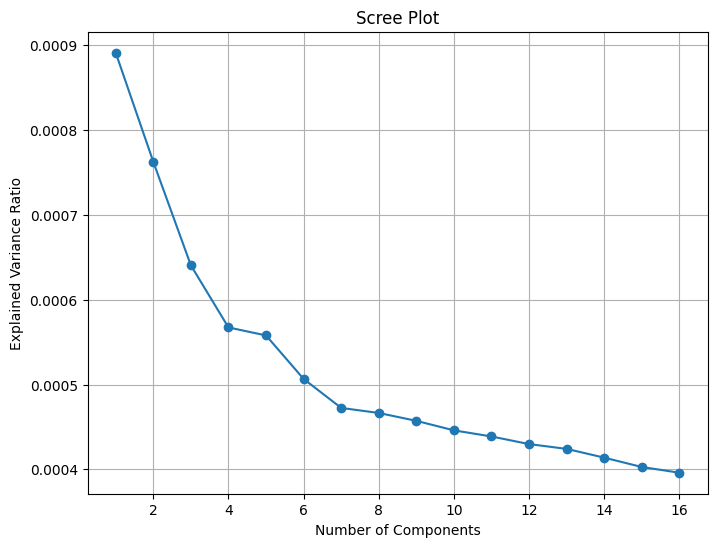

In [13]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

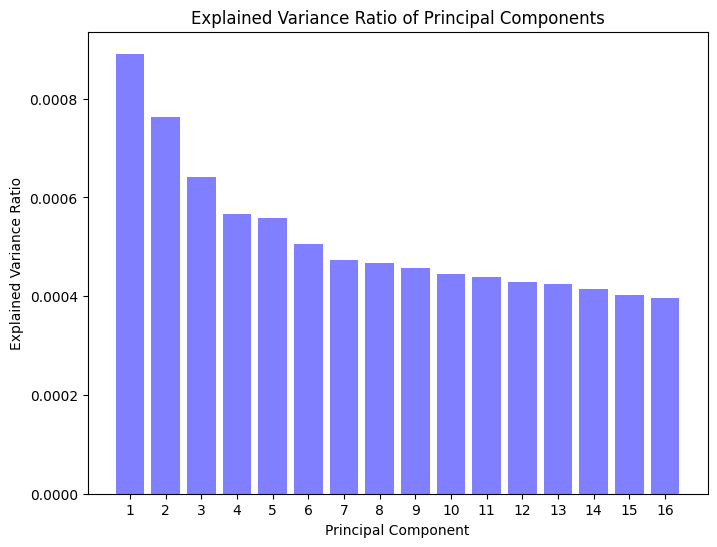

In [14]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


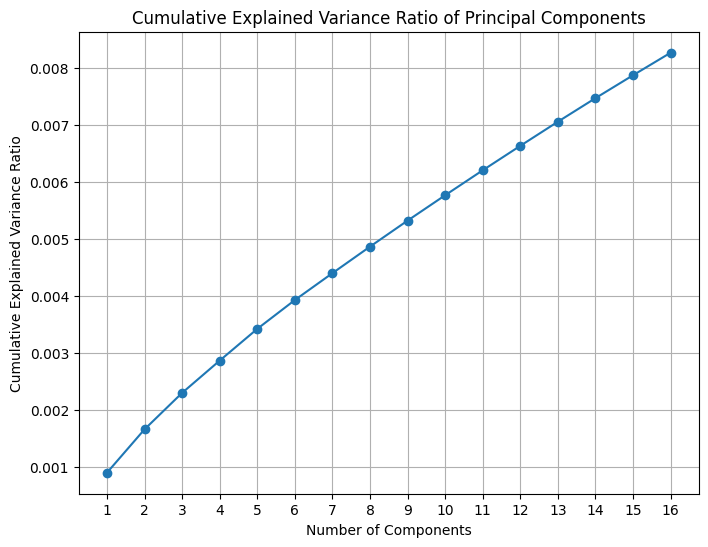

In [15]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools

# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = df['active_status']  # Notice we are using the original unscaled target here

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Logistic Regression
        lr_model = LogisticRegression()
        lr_model.fit(X_train[list(features)], y_train)
        lr_pred = lr_model.predict(X_test[list(features)])
        lr_accuracy = accuracy_score(y_test, lr_pred)

        
        # Store results
        results.append({
            'Features': features,
            'Logistic Regression Accuracy': lr_accuracy,
            
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)  # Display all rows without truncation
print(results_df)


In [ ]:

# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = df['active_status']  # Notice we are using the original unscaled target here

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
       # Random Forest Classifier
        rf_model = RandomForestClassifier()
        rf_model.fit(X_train[list(features)], y_train)
        rf_pred = rf_model.predict(X_test[list(features)])
        rf_accuracy = accuracy_score(y_test, rf_pred)


        
        # Store results
        results.append({
            'Features': features,
            'Random Forest Accuracy': rf_accuracy,
            
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)  # Display all rows without truncation
print(results_df)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = df['active_status']  # Notice we are using the original unscaled target here

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = df['active_status']  # Notice we are using the original unscaled target here

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Define a simple neural network model
        model = Sequential([
            Dense(64, activation='relu', input_shape=(len(features),)),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        model.fit(X_train[list(features)], y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model
        nn_accuracy = model.evaluate(X_test[list(features)], y_test, verbose=0)[1]

        # Store results
        results.append({
            'Features': features,
            'Neural Network Accuracy': nn_accuracy
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

                                              Features  \
0                                         (unique_id,)   
1                                 (disbursement_date,)   
2                            (loan_investment_amount,)   
3                          (lender_insurance_premium,)   
4                                        (metro_type,)   
..                                                 ...   
570  (lender_type_category, optional_stage, support...   
571  (optional_primary_use_of_funds, optional_reven...   
572  (optional_primary_use_of_funds, optional_reven...   
573  (optional_primary_use_of_funds, optional_stage...   
574  (optional_revenue_yr_confirmed, optional_stage...   

     Neural Network Regression RMSE  
0                      4.622066e-07  
1                      4.622066e-07  
2                      9.697468e-01  
3                      9.838180e-01  
4                      4.622066e-07  
..                              ...  
570                    7.263334e-03  